# The Best Ice Cream Ever 🍦
Developer Note: 👾 indicates the description of the code's purpose and the rationale behind each code block.

# 📚 Introduction

This project aims to create the flavor and description of **"The Best Ice Cream Ever"** utalizing data analysis and customer sentiment. The results from this study can be applied in food product development, marketing, and understanding consumer insights, enabling brands to design flavors and craft descriptions that resonate with customer preferences.

# 📖 Background + Related Work

While there is little academic research directly focused on identifying the best ice cream flavor, there are studies that explore related areas such as consumer preferences in food and sensory analysis. For example, studies in the “better-for-you” ice cream category (L.R. Sipple et al., 2022) offer insights into how consumers perceive healthier versions of ice cream. Another area of research includes studies that examine the sensory qualities of ice cream, such as texture and taste, to understand what factors contribute to the overall satisfaction with a product.

In addition, non-academic sources have also explored popular ice cream flavors and trends. The International Dairy Foods Association published an "Ice Cream Trends Survey," highlighting popular flavor trends, toppings, and preferences in the U.S. These insights suggest that flavors like chocolate, caramel, and vanilla continue to dominate, with caramel swirls and mix-ins like cookie dough gaining popularity.

This existing research helps frame our analysis and provides context for understanding how different components (flavors, mix-ins, swirls) influence customer preferences and ice cream ratings.

## 🗂️ Data Selection
The dataset for this project is sourced from Kaggle and includes ice cream products from well-known brands such as Ben & Jerry’s, Häagen-Dazs, Breyers, and Talenti. The dataset contains flavor names, descriptions, ingredients, ratings, and customer reviews. This data will be analyzed to identify the most successful ingredient combinations and how they contribute to high ratings.

Link to the data set: https://www.kaggle.com/datasets/tysonpo/ice-cream-dataset

# ❓Research Questions
1. What are the common components of top-rated ice cream flavors?
2. How do different components interact to create highly-rated combinations?

# 🤔 Hypothesis
- Flavors like vanilla or chocolate may pair well with swirls like caramel or fudge.
- Creative mix-ins, such as cookie dough or chocolate chips, could enhance specific base flavors.
- The combination of ingredients, rather than one perfect flavor, is likely the key to creating highly-rated ice cream.

# 🔍 Methods

## Identify Top Ice Cream Flavors

### Minimum reviews threshold

Find the threshold for the minimum number of reviews required for an ice cream flavor to be considered as a valid candidate in the selection process. This threshold helps ensure that the ice cream flavors being analyzed have received a significant amount of feedback, reducing the risk of biases from products with very few reviews. I aimed to find the value that sat around the 75th percentile of the rating_count (number of ratings each flavor got) distribution.

👾 This code generates a distribution of rating counts for all the ice cream flavors in the dataset. By visualizing the distribution, we can analyze the typical number of reviews for the flavors, as well as examine the spread of data using standard deviations. This will help determine a minimum threshold for flavors, ensuring that only those with a sufficient number of reviews are considered. The goal is to focus on products with reliable and meaningful data, while excluding those with insufficient or skewed feedback.

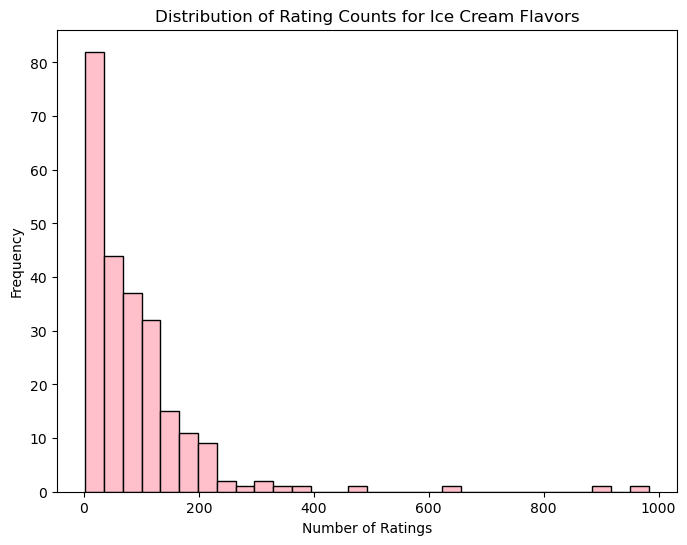

count    241.000000
mean      90.016598
std      111.349449
min        2.000000
25%       28.000000
50%       59.000000
75%      112.000000
max      983.000000
Name: rating_count, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the products dataset
products_file_path = '/home/jovyan/hcde410/final/products.csv' 
products_df = pd.read_csv(products_file_path)

# Step 1: Inspect the distribution of rating_count in the products dataset
rating_count_stats = products_df['rating_count'].describe()

# Plot a histogram of rating_count to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(products_df['rating_count'], bins=30, color='pink', edgecolor='black')
plt.title('Distribution of Rating Counts for Ice Cream Flavors')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Print the descriptive statistics of the rating_count
print(rating_count_stats)


## ⭐️ Minimum review count for reliability: **112 reviews**

👾 Next, we want to identify the top ice cream flavors based on our criteria: a rating above 4.5 and at least 112 ratings. If multiple flavors have the same rating, the rating count acts as a tie breaker, prioritizing those with more reviews. This code filters the dataset to meet these conditions, sorts the results by rating and rating count, and extracts relevant details such as the name, ingredients, description, and brand for each top flavor. We store this information as both a dictionary and a DataFrame for easy reference and future use in the analysis. This ensures we can efficiently access the details of the top-rated flavors when creating "The Best Ice Cream Ever."

In [16]:
import pandas as pd

# Load the products dataset
products_file_path = '/home/jovyan/hcde410/final/products.csv' 
products_df = pd.read_csv(products_file_path)

# Step 1: Filter the products dataset for flavors with a rating > 4.5 and at least 112 ratings
filtered_flavors_df = products_df[(products_df['rating'] > 4.5) & (products_df['rating_count'] >= 112)]

# Step 2: Sort the dataset by rating and rating_count (descending)
sorted_flavors_df = filtered_flavors_df.sort_values(by=['rating', 'rating_count'], ascending=[False, False])

# Step 3: Extract relevant details for the top flavors, including the brand
top_flavors_info = sorted_flavors_df[['name', 'rating', 'rating_count', 'description', 'ingredients', 'brand']]

# Store this filtered information in a dictionary for easy access later
top_flavors_dict = top_flavors_info.to_dict(orient='records')

# Print out the first 5 entries to verify
print(top_flavors_dict[:5])

# You can also store this information as a DataFrame for further analysis
top_flavors_info.head()  # This will show the top 5 rows in the DataFrame


[{'name': 'White Chocolate Raspberry Truffle Ice Cream', 'rating': 4.9, 'rating_count': 168, 'description': 'A truly exquisite ice cream inspired by fine chocolate truffles. We begin with pure white chocolate ice cream and swirl in satisfying chunks of chocolaty fudge truffles and a tangy raspberry ribbon.', 'ingredients': 'CREAM, SKIM MILK, SUGAR, RASPBERRY PUREE, LACTOSE REDUCED SKIM MILK, CORN SYRUP, EGG YOLKS, COCONUT OIL, SOYBEAN OIL, COCOA PROCESSED WITH ALKALI, COCOA POWDER, NATURAL FLAVOR, LEMON JUICE CONCENTRATE, PECTIN, COCOA BUTTER, SALT, VANILLA EXTRACT', 'brand': 'hd'}, {'name': 'Dulce de Leche Ice Cream', 'rating': 4.8, 'rating_count': 209, 'description': "Inspired by Latin America's treasured dessert, our dulce de leche ice cream is a delicious combination of caramel and sweet cream, swirled with ribbons of golden caramel.", 'ingredients': 'CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED MILK, CONDENSED MILK, SUGAR, EGG YOLKS, CORN SYRUP, COCONUT OIL, PECTIN, SOY LECITHIN, 

,name,rating,rating_count,description,ingredients,brand
57,White Chocolate Raspberry Truffle Ice Cream,4.9,168,A truly exquisite ice cream inspired by fine c...,"CREAM, SKIM MILK, SUGAR, RASPBERRY PUREE, LACT...",hd
86,Dulce de Leche Ice Cream,4.8,209,"Inspired by Latin America's treasured dessert,...","CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M...",hd
84,Double Belgian Chocolate Chip Ice Cream,4.8,158,"Your favorite Belgian chocolate ice cream, ren...","CHOCOLATE ICE CREAM: CREAM, SKIM MILK, DARK CH...",hd
51,Sweet Like Sugar Cookie Dough Core,4.8,123,Instead of just giving you some sugar cookie d...,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ...",bj
198,Non-Dairy Vanilla Peanut Butter,4.8,116,Love ice cream but can’t stomach the dairy? Ha...,"ALMOND MILK, WATER, ALMONDS, LIQUID SUGAR, SUG...",breyers


👾 The following code will display the top flavors that we identified from the data set, in order from best to worse. This information will be useful for later analysis, allowing us to compare specific flavors, mix-ins, and other components to see how they interact, uncovering any abnormalities or rare patterns that may emerge in the data. This list is also just a good starting point when thinking about or starting any conversation around top ice cream flavors. (Such as a class presentation on this study😉)

In [17]:
# Initialize a dictionary to track the count of top-rated flavors by brand
brand_count = {}

# Loop through the list of dictionaries and print the name, rating, and number of reviews
# Also track the count of top-rated flavors per brand
for index, flavor in enumerate(top_flavors_dict, start=1):
    # Print the name, rating, review count, brand with a numbered list
    print(f"{index}. {flavor['name']}, Rating: {flavor['rating']}, Reviews: {flavor['rating_count']}, Brand: {flavor['brand']}")
    
    # Update the brand count
    brand = flavor['brand']
    if brand in brand_count:
        brand_count[brand] += 1
    else:
        brand_count[brand] = 1

# Calculate the total number of top-rated flavors
total_top_flavors = len(top_flavors_dict)

# Print the total number of top-rated flavors and the count of flavors by each brand
print(f"\nTotal number of top-rated flavors: {total_top_flavors}")
for brand, count in brand_count.items():
    print(f"Brand: {brand}, Count: {count}")

1. White Chocolate Raspberry Truffle Ice Cream, Rating: 4.9, Reviews: 168, Brand: hd
2. Dulce de Leche Ice Cream, Rating: 4.8, Reviews: 209, Brand: hd
3. Double Belgian Chocolate Chip Ice Cream, Rating: 4.8, Reviews: 158, Brand: hd
4. Sweet Like Sugar Cookie Dough Core, Rating: 4.8, Reviews: 123, Brand: bj
5. Non-Dairy Vanilla Peanut Butter, Rating: 4.8, Reviews: 116, Brand: breyers
6. CARAMEL APPLE PIE GELATO, Rating: 4.8, Reviews: 115, Brand: talenti
7. Half Baked®, Rating: 4.7, Reviews: 887, Brand: bj
8. The Tonight Dough®, Rating: 4.7, Reviews: 639, Brand: bj
9. Americone Dream®, Rating: 4.7, Reviews: 370, Brand: bj
10. MEDITERRANEAN MINT GELATO, Rating: 4.7, Reviews: 324, Brand: talenti
11. Strawberry Cheesecake, Rating: 4.7, Reviews: 231, Brand: bj
12. Chocolate, Rating: 4.7, Reviews: 225, Brand: breyers
13. Caramel Cone Ice Cream, Rating: 4.7, Reviews: 185, Brand: hd
14. ROMAN RASPBERRY SORBETTO, Rating: 4.7, Reviews: 161, Brand: talenti
15. SALTED CARAMEL TRUFFLE, Rating: 4.7, 

## Data Cleaning (Missing Values)
👾 This code focuses on cleaning the dataset by removing rows with missing or empty descriptions. It first drops rows where the "description" column has missing values. Then, it removes any rows with empty or whitespace-only descriptions. This ensures that only products with valid descriptions are included in the dataset for further analysis, improving the quality of the data used in the study. After cleaning, the first few rows of the DataFrame are displayed to verify that the missing descriptions have been successfully handled.

In [18]:
import pandas as pd

# Load the products dataset
products_file_path = '/home/jovyan/hcde410/final/products.csv'
products_df = pd.read_csv(products_file_path)

# Step 1: Clean the data by dropping rows with missing or empty descriptions
# Drop rows where 'description' is missing or empty
products_df = products_df.dropna(subset=['description'])  # Remove rows with missing descriptions
products_df = products_df[products_df['description'].str.strip().notna()]  # Remove rows with empty descriptions

# Display the first few rows to verify that missing descriptions are handled
print(products_df.head())


  brand   key                 name  \
0    bj  0_bj  Salted Caramel Core   
1    bj  1_bj  Netflix & Chilll'd™   
2    bj  2_bj         Chip Happens   
3    bj  3_bj              Cannoli   
4    bj  4_bj       Gimme S’more!™   

                                             subhead  \
0  Sweet Cream Ice Cream with Blonde Brownies & a...   
1  Peanut Butter Ice Cream with Sweet & Salty Pre...   
2  A Cold Mess of Chocolate Ice Cream with Fudge ...   
3  Mascarpone Ice Cream with Fudge-Covered Pastry...   
4  Toasted Marshmallow Ice Cream with Chocolate C...   

                                         description  rating  rating_count  \
0  Find your way to the ultimate ice cream experi...     3.7           208   
1  There’s something for everyone to watch on Net...     4.0           127   
2  Sometimes “chip” happens and everything’s a me...     4.7           130   
3  As a Limited Batch that captured the rapture o...     3.6            70   
4  It’s a gimme: there’s always room for s’m

## Data Preperation (Lowercasing)
👾 This code cleans the description text of each ice cream product by removing punctuation and converting the text to lowercase. The cleaned descriptions are stored in a new column, cleaned_description, ensuring that the text is standardized for easier analysis. This prepares the descriptions for further analysis, such as sentiment analysis or keyword extraction.

In [19]:
import re

# Function to clean the description text
def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

# Apply text cleaning to the description column
products_df['cleaned_description'] = products_df['description'].apply(clean_text)

# Check the cleaned descriptions
print(products_df[['description', 'cleaned_description']].head())


                                         description  \
0  Find your way to the ultimate ice cream experi...   
1  There’s something for everyone to watch on Net...   
2  Sometimes “chip” happens and everything’s a me...   
3  As a Limited Batch that captured the rapture o...   
4  It’s a gimme: there’s always room for s’more. ...   

                                 cleaned_description  
0  find your way to the ultimate ice cream experi...  
1  theres something for everyone to watch on netf...  
2  sometimes chip happens and everythings a mess ...  
3  as a limited batch that captured the rapture o...  
4  its a gimme theres always room for smore and w...  


## Categorize Keywords for Base Flavors, Mix-ins, and Swirls
👾 This code categorizes the ingredients in each ice cream description into three categories: base flavors, mix-ins, and swirls. A predetermined list of keywords for each category was created with the help of ChatGPT. The code checks if any of these keywords appear in each ice cream's description and stores the results in new columns. The final output will show the ice cream name alongside the detected base flavors, mix-ins, and swirls. However, one potential shortcoming of this approach is that the list of ingredients may not cover all possible ingredients, which could lead to overlooking certain components that are not included in the initial list.

In [21]:
# Categorize ingredients into base flavors, mix-ins, and swirls
# Lists of base flavors, mix-ins, and swirls (Utalized ChatGPT to come up with these initial categories)
base_flavors = ['vanilla', 'chocolate', 'strawberry', 'coffee', 'peanut butter', 'banana', 'pumpkin', 'mint', 'caramel', 'cinnamon', 'matcha', 'mango', 'butterscotch', 'coconut']
mix_ins = ['brownies', 'pretzels', 'chocolate chips', 'toffee', 'shortbread cookies', 'fudge brownies', 'cookie dough', 'almonds', 'walnuts', 'cheesecake pieces', 'fudge truffles', 'peanut butter cups', 'oreo cookies', 'hazelnuts', 'raisins']
swirls = ['fudge', 'caramel', 'raspberry puree', 'marshmallow', 'toffee swirl', 'cinnamon streusel', 'whiskey caramel', 'salted caramel', 'brownie batter', 'espresso', 'vanilla bean swirl', 'cherry swirl']

# Function to check if a category keyword is mentioned in the description
def categorize_keywords(description, keywords):
    return [keyword for keyword in keywords if keyword in description]

# Apply categorization to each description
products_df['base_flavors_found'] = products_df['cleaned_description'].apply(lambda x: categorize_keywords(x, base_flavors))
products_df['mix_ins_found'] = products_df['cleaned_description'].apply(lambda x: categorize_keywords(x, mix_ins))
products_df['swirls_found'] = products_df['cleaned_description'].apply(lambda x: categorize_keywords(x, swirls))

# Display the results
print(products_df[['name', 'base_flavors_found', 'mix_ins_found', 'swirls_found']].head())


                  name base_flavors_found mix_ins_found  \
0  Salted Caramel Core          [caramel]    [brownies]   
1  Netflix & Chilll'd™                 []            []   
2         Chip Happens        [chocolate]            []   
3              Cannoli                 []            []   
4       Gimme S’more!™        [chocolate]            []   

                swirls_found  
0  [caramel, salted caramel]  
1                         []  
2                    [fudge]  
3                         []  
4                         []  


## Count Ingredient Frequencies

👾 This code counts the frequency of each ingredient category (base flavors, mix-ins, and swirls) across all ice cream descriptions, helping to identify the most common ingredients in top-rated products. This information will be useful for creating visualizations that highlight popular flavors and ingredient combinations, offering a an engaging way to analyze consumer preferences. 

In [22]:
from collections import Counter

# Count the frequency of each category across all descriptions
base_flavors_count = Counter([item for sublist in products_df['base_flavors_found'] for item in sublist])
mix_ins_count = Counter([item for sublist in products_df['mix_ins_found'] for item in sublist])
swirls_count = Counter([item for sublist in products_df['swirls_found'] for item in sublist])

# Display the counts for each category
print("Base Flavors Count:", base_flavors_count)
print("Mix-ins Count:", mix_ins_count)
print("Swirls Count:", swirls_count)


Base Flavors Count: Counter({'chocolate': 112, 'vanilla': 82, 'caramel': 37, 'peanut butter': 20, 'coffee': 15, 'mint': 13, 'strawberry': 7, 'coconut': 7, 'banana': 5, 'cinnamon': 4, 'mango': 3, 'pumpkin': 2, 'matcha': 2, 'butterscotch': 1})
Mix-ins Count: Counter({'cookie dough': 9, 'almonds': 7, 'peanut butter cups': 6, 'brownies': 5, 'toffee': 5, 'chocolate chips': 4, 'oreo cookies': 4, 'fudge truffles': 3, 'cheesecake pieces': 2, 'shortbread cookies': 1, 'pretzels': 1, 'fudge brownies': 1, 'raisins': 1})
Swirls Count: Counter({'fudge': 40, 'caramel': 37, 'salted caramel': 6, 'marshmallow': 6, 'espresso': 3, 'brownie batter': 2, 'raspberry puree': 1, 'toffee swirl': 1})


## Visualize the Frequencies of Each Category
👾 This code generates a set of bar charts that visually represent the frequency of ingredients in each category: base flavors, mix-ins, and swirls. The bars are colored using a rainbow colormap, 1. because I like rainbows 2. to add differentiation between the bars. However, the aesthetics of the bars are not critical, and if you're recreating this study, you can use your own judgment for the visual style. The frequency counts are displayed above the bars, making it easier to compare the popularity of different ingredients. This visualization helps identify the most common ingredients in top-rated ice cream products.

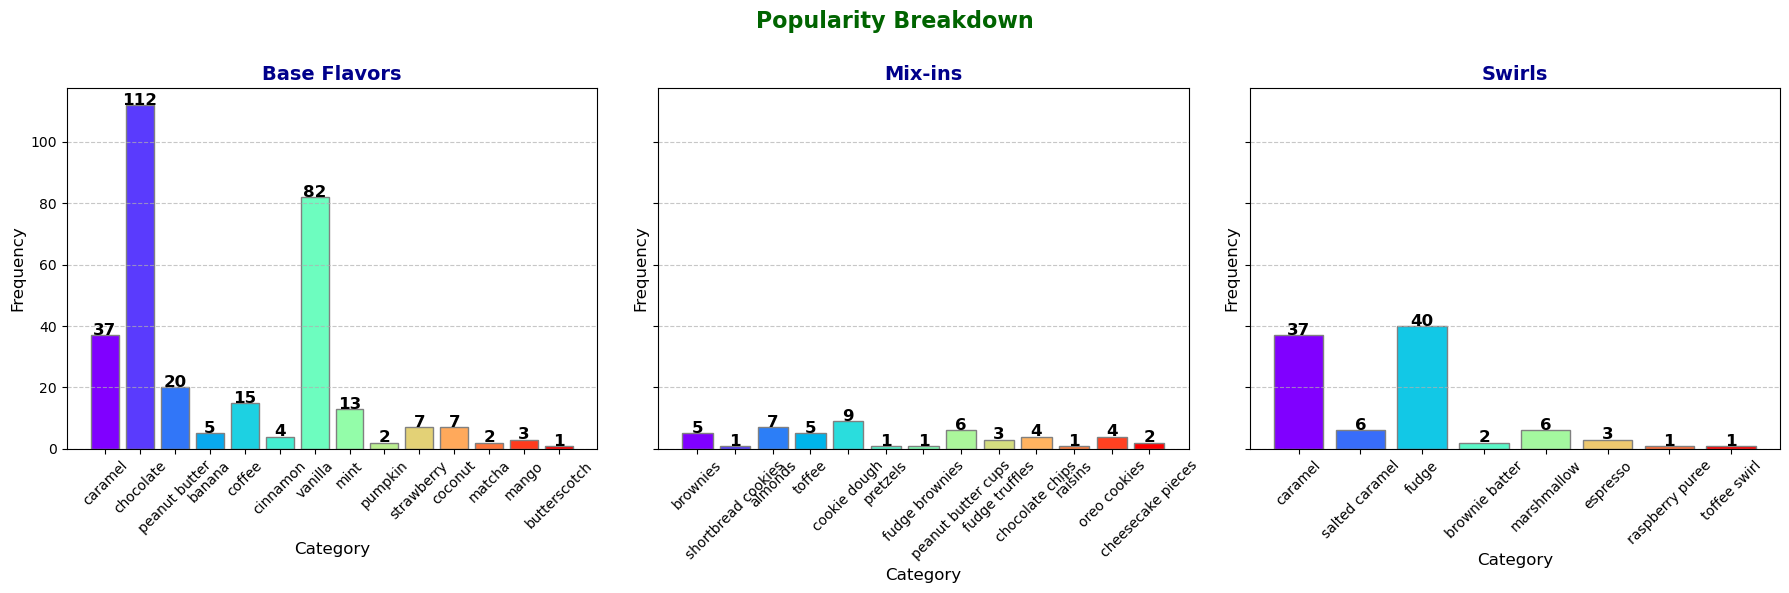

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the counts with enhanced aesthetics and frequency labels above the bars
def plot_category_counts(category_count, title, ax):
    # Use a rainbow colormap for the bars
    colors = plt.cm.rainbow(np.linspace(0, 1, len(category_count)))

    # Create the bars with rainbow colors
    bars = ax.bar(category_count.keys(), category_count.values(), color=colors, edgecolor='gray')
    
    # Add frequency numbers above the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05,  # Adjust vertical position
                str(int(yval)), ha='center', fontsize=12, color='black', fontweight='bold')

    ax.set_title(title, fontsize=14, fontweight='bold', color='darkblue')
    ax.set_xlabel('Category', fontsize=12, color='black')
    ax.set_ylabel('Frequency', fontsize=12, color='black')
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Create subplots with improved layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Base Flavors
plot_category_counts(base_flavors_count, 'Base Flavors', axes[0])

# Plot for Mix-ins
plot_category_counts(mix_ins_count, 'Mix-ins', axes[1])

# Plot for Swirls
plot_category_counts(swirls_count, 'Swirls', axes[2])

# Add overall title
fig.suptitle('Popularity Breakdown', fontsize=16, fontweight='bold', color='darkgreen')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Make room for the main title

# Show the plots
plt.show()


## Finding Correlations Pt. 1
👾 This code creates binary indicators for the presence of specific ingredients (base flavors, mix-ins, and swirls) in each ice cream product. Each ingredient gets a column where a 1 means it's present and a 0 means it's not. The binary columns are then combined into one DataFrame, which is the first step in creating co-occurrence visualizations to explore relationships and patterns between different ingredients.

In [24]:
import pandas as pd

# Example base flavors, mix-ins, and swirls lists (you may have your actual lists)
base_flavors = ['vanilla', 'chocolate', 'strawberry', 'coffee', 'banana']
mix_ins = ['chocolate chip cookie dough', 'brownies', 'peanut butter cups', 'cookie dough', 'almonds']
swirls = ['caramel', 'fudge', 'raspberry puree', 'marshmallow', 'cinnamon']

# Assuming 'base_flavors_found', 'mix_ins_found', 'swirls_found' columns exist in products_df
base_flavors_binary = pd.DataFrame([[1 if flavor in row else 0 for flavor in base_flavors] 
                                   for row in products_df['base_flavors_found']],
                                   columns=base_flavors)

mix_ins_binary = pd.DataFrame([[1 if mixin in row else 0 for mixin in mix_ins] 
                               for row in products_df['mix_ins_found']],
                              columns=mix_ins)

swirls_binary = pd.DataFrame([[1 if swirl in row else 0 for swirl in swirls] 
                              for row in products_df['swirls_found']],
                             columns=swirls)

# Combine all the binary columns into one DataFrame
product_binary_df = pd.concat([base_flavors_binary, mix_ins_binary, swirls_binary], axis=1)

# Display the combined binary DataFrame to ensure correct categorization
print(product_binary_df.head())


   vanilla  chocolate  strawberry  coffee  banana  \
0        0          0           0       0       0   
1        0          0           0       0       0   
2        0          1           0       0       0   
3        0          0           0       0       0   
4        0          1           0       0       0   

   chocolate chip cookie dough  brownies  peanut butter cups  cookie dough  \
0                            0         1                   0             0   
1                            0         0                   0             0   
2                            0         0                   0             0   
3                            0         0                   0             0   
4                            0         0                   0             0   

   almonds  caramel  fudge  raspberry puree  marshmallow  cinnamon  
0        0        1      0                0            0         0  
1        0        0      0                0            0         0  
2    

## Finding Correlations Pt. 2
👾 This step is part of data cleaning, where any missing values (NaN) in the binary DataFrame are replaced with 0. This ensures that all rows are complete, with no missing data, making the dataset consistent and ready for further analysis. Handling missing values is essential to avoid errors in subsequent steps, such as generating visualizations or conducting calculations.

In [25]:
# Fill any missing values (NaN) with 0
product_binary_df = product_binary_df.fillna(0)

# Verify the cleaned DataFrame
print(product_binary_df.head())


   vanilla  chocolate  strawberry  coffee  banana  \
0        0          0           0       0       0   
1        0          0           0       0       0   
2        0          1           0       0       0   
3        0          0           0       0       0   
4        0          1           0       0       0   

   chocolate chip cookie dough  brownies  peanut butter cups  cookie dough  \
0                            0         1                   0             0   
1                            0         0                   0             0   
2                            0         0                   0             0   
3                            0         0                   0             0   
4                            0         0                   0             0   

   almonds  caramel  fudge  raspberry puree  marshmallow  cinnamon  
0        0        1      0                0            0         0  
1        0        0      0                0            0         0  
2    

## Finding Correlations Pt. 3
👾 This code generates three heatmaps to visualize the co-occurrence of ingredients across different categories: base flavors, mix-ins, and swirls. The first heatmap shows the co-occurrence between base flavors and mix-ins, the second one between base flavors and swirls, and the third heatmap displays the co-occurrence between mix-ins and swirls. These heatmaps provide a clear, visual representation of ingredient relationships, helping to identify popular or unusual combinations.

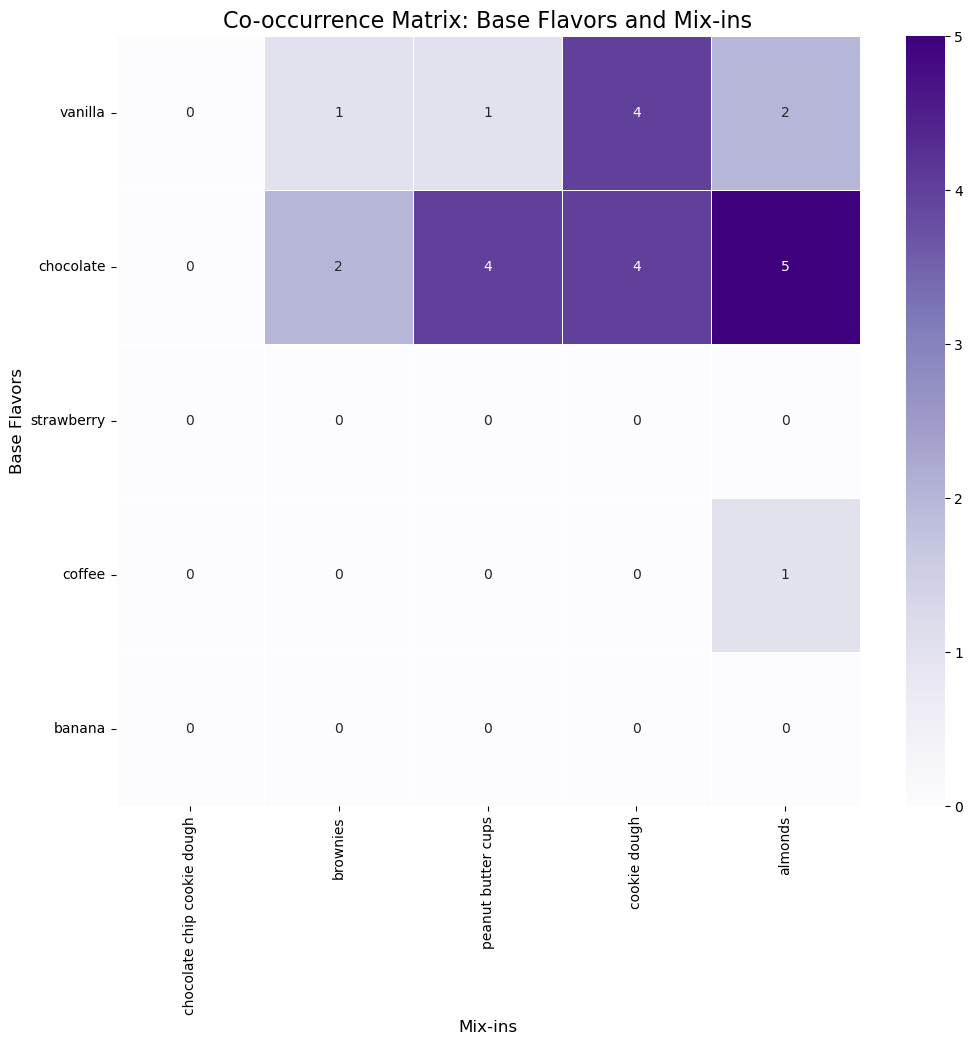

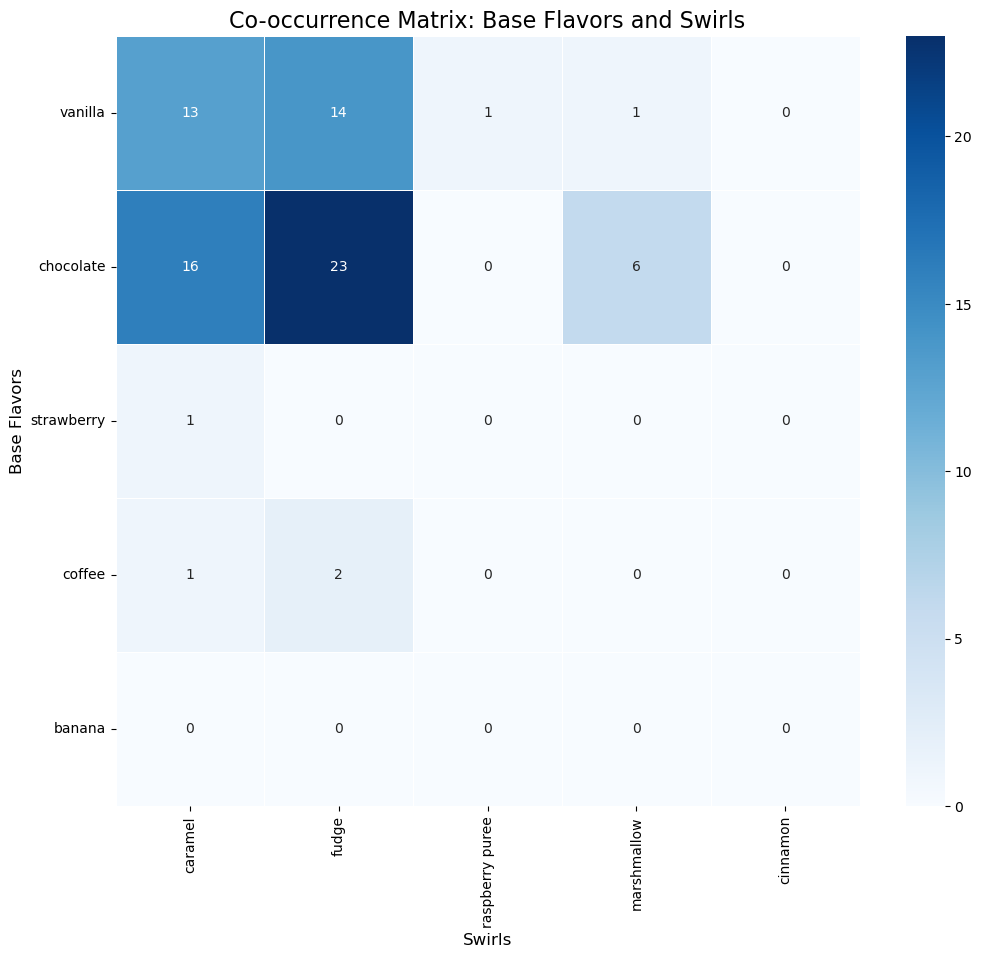

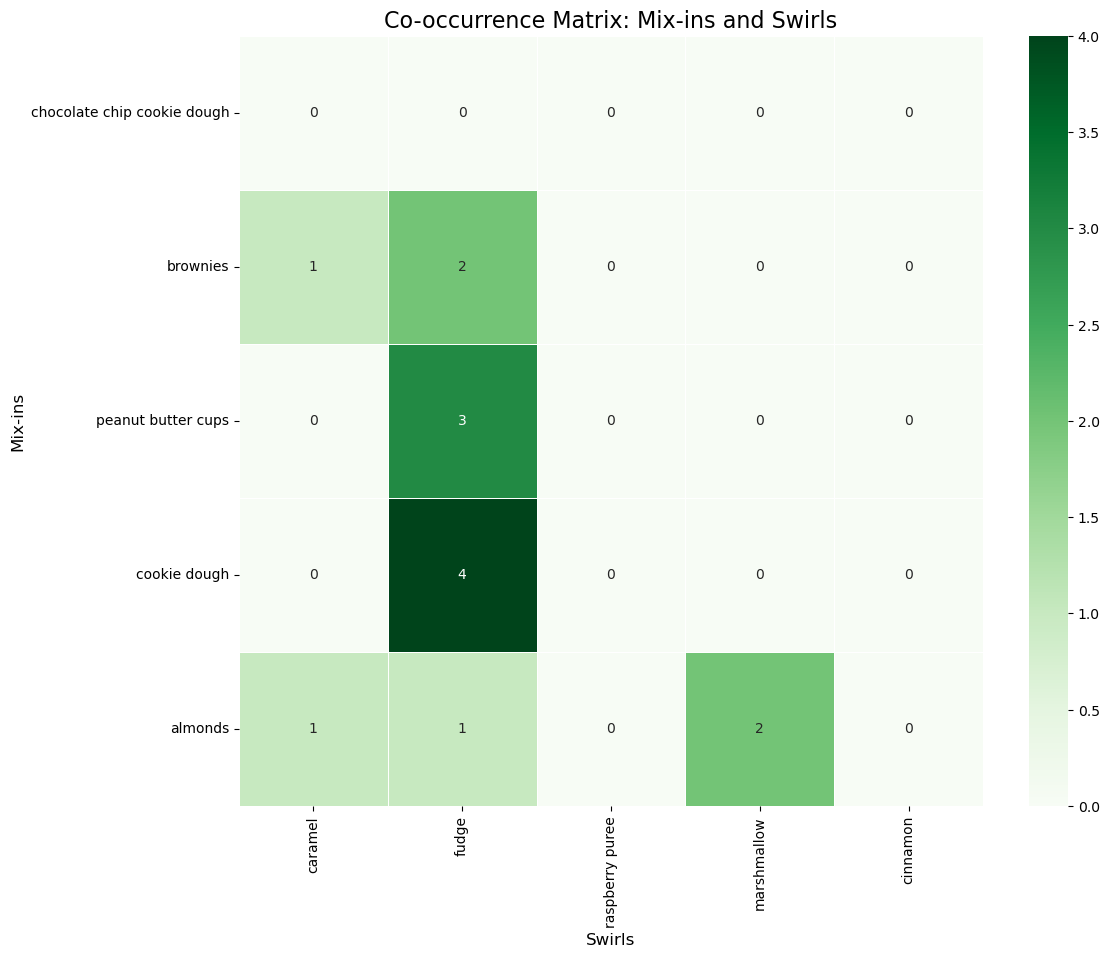

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap for Base Flavors vs Mix-ins
base_flavors_mixins = product_binary_df[base_flavors].T.dot(product_binary_df[mix_ins])

# Create the heatmap for Base Flavors vs Mix-ins
plt.figure(figsize=(12, 10))
sns.heatmap(base_flavors_mixins, annot=True, fmt="d", cmap='Purples', linewidths=0.5)

# Customize the plot
plt.title('Co-occurrence Matrix: Base Flavors and Mix-ins', fontsize=16)
plt.xlabel('Mix-ins', fontsize=12)
plt.ylabel('Base Flavors', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

# Create the heatmap for Base Flavors vs Swirls
base_flavors_swirls = product_binary_df[base_flavors].T.dot(product_binary_df[swirls])

# Create the heatmap for Base Flavors vs Swirls
plt.figure(figsize=(12, 10))
sns.heatmap(base_flavors_swirls, annot=True, fmt="d", cmap='Blues', linewidths=0.5)

# Customize the plot
plt.title('Co-occurrence Matrix: Base Flavors and Swirls', fontsize=16)
plt.xlabel('Swirls', fontsize=12)
plt.ylabel('Base Flavors', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

# Create the heatmap for Mix-ins vs Swirls
mix_ins_swirls = product_binary_df[mix_ins].T.dot(product_binary_df[swirls])

# Create the heatmap for Mix-ins vs Swirls
plt.figure(figsize=(12, 10))
sns.heatmap(mix_ins_swirls, annot=True, fmt="d", cmap='Greens', linewidths=0.5)

# Customize the plot
plt.title('Co-occurrence Matrix: Mix-ins and Swirls', fontsize=16)
plt.xlabel('Swirls', fontsize=12)
plt.ylabel('Mix-ins', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()


# 💬 Findings + Discussion
---
This analysis of ice cream flavor preferences reveals several interesting trends, a couple anomalies and highlighting the complexity of consumer tastes and how certain flavors and ingredients work together to create top-rated flavor profiles.

## 🍫 Popular Bases + Their Relative Versatility
Chocolate, vanilla, and caramel emerge as the most common and popular base flavors. Chocolate leads with 112 occurrences, followed by vanilla (82) and caramel (37). Other notable bases include peanut butter, coffee, and mint, although these appear less frequently. Chocolate and vanilla’s dominance indicates their versatility and ability to complement a wide range of mix-ins and swirls. Furthermore, the co-occurrence matrix confirms chocolate’s flexibility, pairing strongly with cookie dough, brownies, and peanut butter cups, making it the most adaptable base flavor. Vanilla appears frequently as well, especially alongside indulgent mix-ins like cookie dough and peanut butter cups, but it has fewer pairings than chocolate, reflecting its more moderate versatility as a base flavor. Lastly, flavors like strawberry, coffee, and banana as less versatile bases. Strawberry, coffee, and banana base flavors appear less frequently in combinations with mix-ins, particularly banana, which does not appear in any combination. This may suggest that these flavors are less flexible to mix-ins and swirls and/or popular compared to chocolate and vanilla.

## 🍯 Popular Swirls + Standouts
Caramel and fudge stand out as the most popular swirls, with numerous flavors incorporating them. The co-occurrence matrices confirm this by showing frequent pairings of these swirls with popular mix-ins such as cookie dough and peanut butter cups. However, raspberry puree as a swirl is rare, yet its presence in White Chocolate Raspberry Truffle Ice Cream, which ranked #1, highlights their potential to elevate a flavor profile. This supports the notion that less common ingredients can significantly enhance the appeal of a flavor when used effectively.

## 🍪 Popular Mix-ins
Cookie dough is the most popular mix-in, appearing in 9 flavors, followed by almonds (7) and peanut butter cups (6). Other common mix-ins include toffee, brownies, chocolate chips, and Oreos. The co-occurrence data reflects this, showing that these mix-ins are frequently paired with chocolate and vanilla bases. Even though mix-ins like shortbread cookies, raisins, and pretzels only show up once, they still have a place among the top-rated flavors. These ingredients might appeal to a smaller, more adventurous crowd, but when used the right way, they can make a flavor feel special and unique. This presents an opportunity for experimentation, particularly for brands looking to target more adventurous or regional markets with unique combinations.

## 🍏 Notable Observations
Caramel Apple Pie Gelato, ranked 6th, is an outlier in this dataset. It features a fruity base (apple) with an apple-pie mix-in, contrasting with the richer, more decadent profiles of the other top-ranked flavors. This highlights appeal of unconventional flavors and suggests that consumers are open to exploring unique options when they are well executed.
The second-ranked Dulce de Leche Ice Cream stands out for its simplicity, containing no mix-ins. This challenges the idea that complex flavor profiles with multiple mix-ins and swirls are required for success. Instead, it emphasizes that a single, rich, and well-balanced flavor can still rank highly among consumers.

# 🍦 Conclusion
---
Based on our observations, crafting successful ice cream flavors involves balancing traditional consumer preferences with opportunities for unique, unconventional combinations. 

## 🥄 Creating Well-Loved Flavor Profiles
#### *Traditional Bases and Pairings:*
- Chocolate and vanilla are timeless favorites, known for their versatility and broad appeal. These classic base flavors pair perfectly with popular mix-ins like cookie dough, almonds, and peanut butter cups. These decadent yet nostalgic flavor profiles are tried and true and will most likely remain fan favorites for years to come.

#### *Leveraging Popular Swirls:*
- Caramel and fudge stand out as swirls with proven popularity. These can elevate both traditional and more adventurous flavor profiles when paired thoughtfully.
- For example, a swirl of caramel or fudge can add depth and richness to lighter or fruity bases, balancing sweetness and indulgence. This combination is built upon in the next section.

## 🌟 Opportunities for Unique, Non-Traditional Flavors
- Turning popular desserts into ice cream flavors is a great way to create something that feels both familiar and exciting. Take strawberry cheesecake, for example—what started as a classic dessert has become a fan-favorite ice cream flavor, showing how comforting flavors can be transformed into something new.
- One possibility for a new flavor might be some with strawberry and fudge, inspired by chocolate-covered strawberries, could strike the perfect balance between creativity and nostalgia, appealing to both adventurous and traditional ice cream lovers.

#### *Experimentation with Rare Ingredients:*
- While less common mix-ins (e.g., shortbread cookies, pretzels) and swirls (e.g., fruit purees) may not dominate the dataset, their presence in high-ranking flavors highlights their ability to create a special, unique flavor profile.
- This presents an opportunity for brands to target niche or adventurous ice cream lovers, particularly with regionally inspired flavor combinations or limited-edition releases.
  
## 🎨 Balancing Flavor Complexity
- Success doesn’t always require intricate combinations of mix-ins and swirls. The simplicity of Dulce de Leche Ice Cream (#2 ranked) illustrates the power of a well-balanced, single-note flavor.
- However, flavors like Caramel Apple Pie Gelato (#6 ranked)  highlight that consumers are open to unconventional profiles when executed thoughtfully. This highlights the importance of carefully designing flavors so that every element works together to create a balanced and enjoyable experience.
  
## 💡 Crafting with Intention
Creating flavors isn’t an exact science—people’s tastes can vary so much depending on where they’re from, how old they are, and what they like. But by blending trends, classic favorites, and bold new ideas, and putting real thought into how flavors and textures come together, there’s opportunity to create the next set of ice cream flavors people will love.

# ⚠️ Limitations
---

## 🌎 Sample Size and Representation
The analysis may not fully represent the diversity of consumer preferences, as the sample might not adequately account for variations across regions, age groups, and cultural backgrounds.

## 🎯 Promotion-Based Bias
Some data was collected through a promotion, which could act as a confounding factor in determining whether the results genuinely reflect consumer sentiment. This potential bias limits the accuracy of the findings.

## 🍦 Focus on Traditional Flavors
While the analysis highlights traditional and popular combinations, it may not sufficiently explore opportunities for more unconventional or experimental flavors. For example, hand-crafted flavors from local ice cream shops or unique creations like lavender honey or balsamic strawberry are often not represented in the dataset. These types of artisanal flavors could provide valuable insights into preferences that appeal to certain ice cream lovers, which are overlooked in this analysis. This limitation may restrict the ability to fully understand and predict future directions for flavor innovation.

## 🌦️ Subjectivity of Preferences
Ice cream flavor preferences are highly personal and influenced by factors like taste, mood, cultural background, and context. For instance, someone might crave rich chocolate on a cold night in, while another prefers refreshing mango sorbet on a hot day by the beach. These differences make it challenging to generalize findings, highlighting the need for flexibility and variety to cater to a diverse range of tastes.

# References
---

1. L.R. Sipple, C.M. Racette, A.N. Schiano, M.A. Drake,
    Consumer perception of ice cream and frozen desserts in the “better-for-you” category,
    Journal of Dairy Science,
    Volume 105, Issue 1,
    2022,
    Pages 154-169,
    ISSN 0022-0302,
    https://doi.org/10.3168/jds.2021-21029.
    (https://www.sciencedirect.com/science/article/pii/S0022030221010006)
2. International Dairy Foods Association. "What's the Scoop? IDFA Releases New Ice Cream Trends Survey with America's Top Flavors, Toppings, and Ways to Eat Ice Cream."
   International Dairy Foods Association, 14 July 2021, www.idfa.org/news/whats-the-scoop-idfa-releases-new-ice-cream-trends-survey-with-americas-top-flavors-toppings-and-ways-to-eat-ice-cream.
3. OpenAI. ChatGPT, 2024, www.openai.com/chatgpt. Accessed 5 Dec. 2024. (Coding help)